In [1]:
from keras.datasets import mnist
from keras import utils as np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_Train4D=x_train.reshape(x_train.shape[0],28,28,1).astype('float32')
x_Test4D=x_test.reshape(x_test.shape[0],28,28,1).astype('float32')
x_Train4D_normalize=x_Train4D/255
x_Test4D_normalize=x_Test4D/255

In [3]:
y_TrainOneHot=np_utils.to_categorical(y_train)
y_TestOneHot=np_utils.to_categorical(y_test)

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [5]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        3216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
__________

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
x_Train4D_normalize=x_Train4D_normalize[:1000]
y_TrainOneHot=y_TrainOneHot[:1000]
train_history = model.fit(x=x_Train4D_normalize, y=y_TrainOneHot, validation_split=0.2, epochs=20, batch_size=300, verbose=2)

Train on 800 samples, validate on 200 samples
Epoch 1/20
 - 40s - loss: 2.3161 - acc: 0.1025 - val_loss: 2.2902 - val_acc: 0.1500
Epoch 2/20
 - 22s - loss: 2.2811 - acc: 0.1313 - val_loss: 2.2782 - val_acc: 0.2050
Epoch 3/20
 - 19s - loss: 2.2723 - acc: 0.1537 - val_loss: 2.2573 - val_acc: 0.2600
Epoch 4/20
 - 20s - loss: 2.2495 - acc: 0.1837 - val_loss: 2.2267 - val_acc: 0.3200
Epoch 5/20
 - 23s - loss: 2.2174 - acc: 0.2238 - val_loss: 2.1915 - val_acc: 0.3250
Epoch 6/20
 - 21s - loss: 2.1937 - acc: 0.1987 - val_loss: 2.1535 - val_acc: 0.3000
Epoch 7/20
 - 22s - loss: 2.1706 - acc: 0.2187 - val_loss: 2.1065 - val_acc: 0.3300
Epoch 8/20
 - 22s - loss: 2.1218 - acc: 0.2125 - val_loss: 2.0519 - val_acc: 0.3900
Epoch 9/20
 - 23s - loss: 2.0935 - acc: 0.2425 - val_loss: 2.0006 - val_acc: 0.4750
Epoch 10/20
 - 23s - loss: 2.0557 - acc: 0.2525 - val_loss: 1.9434 - val_acc: 0.4900
Epoch 11/20
 - 21s - loss: 2.0176 - acc: 0.2550 - val_loss: 1.8788 - val_acc: 0.4900
Epoch 12/20
 - 20s - loss: 1

In [9]:
model.save('t04.h5')

In [10]:
import matplotlib.pyplot as plt
def show_train_history(train_acc, test_acc):
    plt.plot(train_history.history[train_acc])   
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel("Epoch")
    plt.legend(['train','test'], loc = 'upper left')
    plt.show()

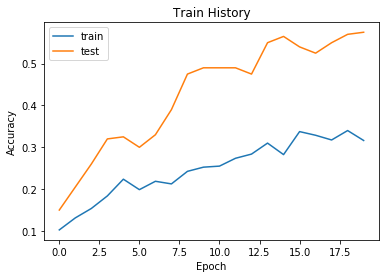

In [11]:
show_train_history('acc','val_acc')

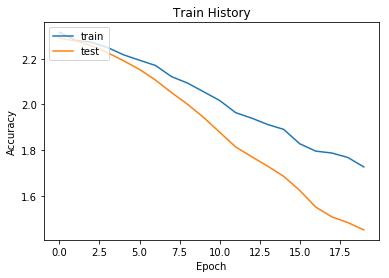

In [12]:
show_train_history('loss','val_loss')

In [15]:
scores = model.evaluate(x_Test4D_normalize, y_TestOneHot)
scores[1]

10000/10000 [==============================] - 2s 186us/step


0.5683

In [16]:
prediction=model.predict_classes(x_Test4D_normalize)

In [17]:
prediction[:10]

array([7, 2, 1, 9, 9, 1, 7, 9, 2, 9], dtype=int64)

In [26]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0, num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx], cmap='binary')
        ax.set_title('label=' + str(labels[idx]) + ", prediction=" + str(prediction[idx]), fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx+=1
    plt.show()

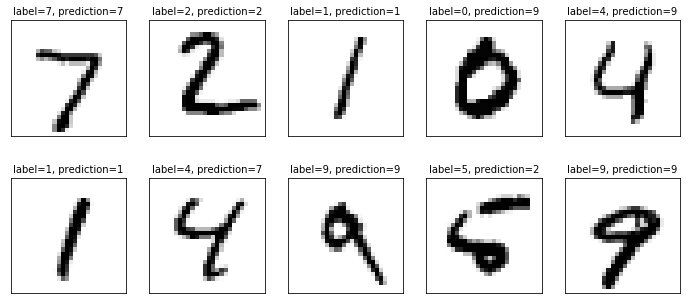

In [27]:
plot_images_labels_prediction(x_test, y_test, prediction, idx = 0)

In [29]:
import pandas as pd
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,126,0,131,3,0,66,0,5,87,562
1,0,1111,1,11,0,0,2,1,0,9
2,2,13,909,15,0,7,20,29,14,23
3,0,7,31,893,0,21,0,26,3,29
4,0,15,41,0,3,13,2,457,0,451
5,39,5,37,339,1,270,3,28,27,143
6,7,33,582,47,1,18,188,22,42,18
7,0,20,20,1,0,0,1,905,0,81
8,6,18,13,119,1,7,7,25,498,280


In [32]:
df = pd.DataFrame({'label':y_test, 'predict':prediction})

In [34]:
df[(df.label==5)&(df.predict==3)]

,label,predict
15,5,3
23,5,3
45,5,3
53,5,3
102,5,3
120,5,3
129,5,3
132,5,3
153,5,3
165,5,3
